### Regork Grocery Data Analysis 
## Group 19 


                                           
                                           
                                                                                       

# Synopsis

1.**Problem Statement**: The objective of this project is to explore the Regork dataset and identifying a potential area of growth where the company could invest future resources to increase revenue and profits.

2.**Solution Overview**: The Complete journey provides access to data sets characterizing household level transactions over one year from a group of 2,469 households who are frequent shoppers at a grocery store:

+ Out of all these households around 17% of them contribute to nearly 60% of the sales over the year
+ So, Instead of diversifying our efforts on the whole consumers if we understand the profile of these 17% consumers then we can create an efficient Investment and marketing strategy
+ For these top consumers, different Business metrics such as avg order value, avg orders, avg quantity per order and avg coupon redemptions are considered.

# Packages

Following packages were used:

+ completejourney_py: Used to extract data from the source
+ pandas: Used to create dataframes
+ matplotlib: Used to plot graphs
+ ggplot: Used for plotting the data
+ datetime: Used to format the dates
+ warnings: Used to silent warnings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime
from completejourney_py import get_data
from pandas.api.types import CategoricalDtype
from datetime import datetime



# Data Preparation

**In this section we will be covering the below topics:**

+ Importing the datasets into the environment
+ Working on the hypothesis which we have established
+ Validation of the hypothesis over the time period so that we have concrete evidence on it

## Importing Data

In [ ]:
There are eight built-in data sets available in this package. The data sets include:

+ campaigns: campaigns received by each household
+ campaign_descriptions: campaign metadata (length of time active)
+ coupons: coupon metadata (UPC code, campaign, etc.)
+ coupon_redemptions: coupon redemptions (household, day, UPC code, campaign)
+ demographics: household demographic data (age, income, family size, etc.)
+ products: product metadata (brand, description, etc.)

To access the full promotions and transactions data, we used the following code:

In [ ]:
cj_data = get_data()

transactions=cj_data['transactions']
products=cj_data['products']
coupons=cj_data['coupons']
campaigns=cj_data['campaigns']
demographics=cj_data['demographics']
campaign_descriptions=cj_data['campaign_descriptions']
coupon_redemptions=cj_data['coupon_redemptions']

## Hypothesis creation - Generic level

**Followed the below approach for finding the top 25% consumers from the whole data:**

+ Computed the overall sales for each household
+ Created quantile groups based on the overall sales
+ For each consumer groups plotted the percentage contribution towards the overall sales of Regork
+ We will be using the same consumer groups across the analysis
+ Below chart provides the contribution of each consumer group
+ Next step will be understanding whether these top consumers are consistent across the months are not

**Comments on the charts:**

+ We can clearly see the contribution of top 25% consumers is highest with around 60%
+ Out of 2,469 households around 420 consumers are classified as top consumers

In [2]:
# Calculating the sales value as per Quartiles of households

householdsales=transactions.groupby("household_id",as_index=False)['sales_value'].sum().sort_values(by="sales_value",ascending=False)

# dividing into quartiles

householdsales=householdsales.reset_index()

householdsales['number']=1

perc_factor=1/householdsales.shape[0]

householdsales['perc_household']=householdsales['number']*perc_factor

perc_number=householdsales['perc_household']

percentile=[]
for i in range(len(perc_number)):
    percentile.append(perc_number[i]*(i+1))

householdsales['Percentile_Number']=percentile
householdsales['Percentile_Number']=householdsales['Percentile_Number']*100

def household_quartile (x):
    if x<=25 :
        return 'Top 25%'
    elif x>25 and x<=50 :
        return 'Between 25-50%'
    elif x>50 and x<=75:
        return 'Between 50-75%'
    else:
        return 'lower 25%'

householdsales['Household_Quartile'] = householdsales['Percentile_Number'].apply(household_quartile)



In [3]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i]//2, y[i], ha = 'center')

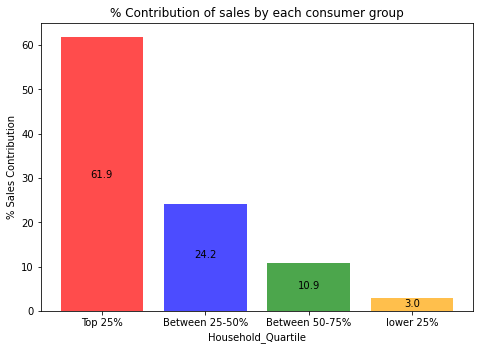

In [4]:
quartilesales=householdsales.groupby('Household_Quartile',as_index=False)['sales_value'].sum()

totalsales=quartilesales['sales_value'].sum()
quartilesales['Percentage_sales']=round(quartilesales['sales_value']*100/totalsales,1)

Quartiles=['Top 25%','Between 25-50%','Between 50-75%','lower 25%']
quartilesales['Household_Quartile'] = pd.Categorical(quartilesales['Household_Quartile'], categories=Quartiles, ordered=True)
quartilesales=quartilesales.sort_values(by='Household_Quartile')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

Household_Quartile=quartilesales['Household_Quartile']
percentage=quartilesales['Percentage_sales']

ax.bar(Household_Quartile,percentage,color=['red','blue','green','orange'],alpha=0.7)
ax.set_ylabel('% Sales Contribution')
ax.set_xlabel('Household_Quartile')
ax.set_title('% Contribution of sales by each consumer group')

addlabels(Household_Quartile,percentage)
plt.style.use('ggplot')
plt.show()

## Hypothesis validation - Monthly level

**Validation of the consumer segment at an month level**:

+ Computed the overall sales for each household over the months
+ Created quantile groups based on the overall sales over the months

**Comments on the charts**:

- We can clearly see the contribution of top 25% consumers is highest with around 60% across the months
- So, we can say that these top 25% of consumers are important from the investment and marketing point of view
+ From sales distribution in different quartile groups, across the months, it is evident the trend remains almost similar

In [5]:

Transac_Main=householdsales.merge(transactions,how='inner',on='household_id')

Transac_Main['month']=Transac_Main['transaction_timestamp'].dt.strftime("%b")

Monthlyquartile=Transac_Main.groupby(['month','Household_Quartile'],as_index=False)['sales_value_y'].sum()


In [6]:
# Creating ordered categories for both months and quartiles

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Monthlyquartile['month'] = pd.Categorical(Monthlyquartile['month'], categories=months, ordered=True)
Monthlyquartile.sort_values(by='month')

Quartiles=['Top 25%','Between 25-50%','Between 50-75%','lower 25%']
Monthlyquartile['Household_Quartile'] = pd.Categorical(Monthlyquartile['Household_Quartile'], categories=Quartiles, ordered=True)
Monthlyquartile=Monthlyquartile.sort_values(by=['month','Household_Quartile'])

Monthlyquartile['Percentage_sales'] = Monthlyquartile.groupby('month')['sales_value_y'].transform(lambda x: x*100/x.sum())


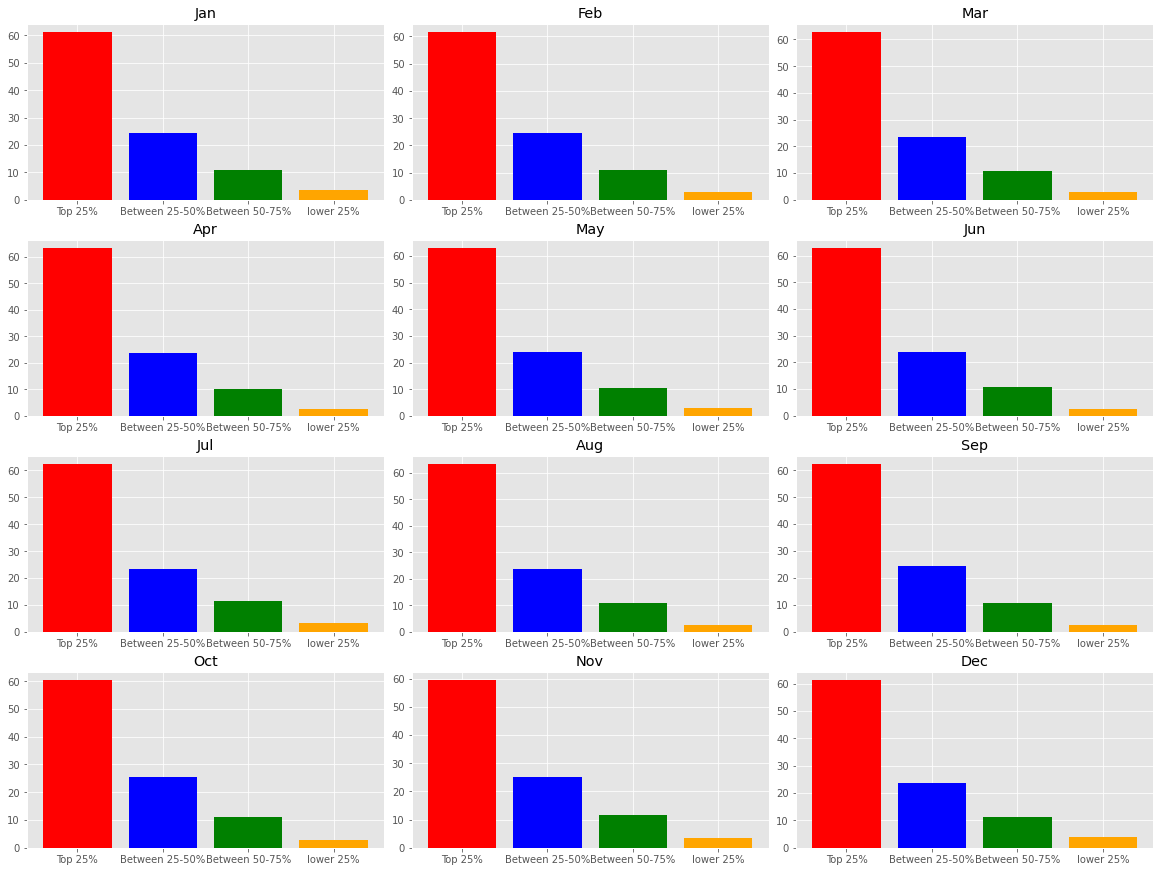

In [7]:
# creating data frames for all months for month wise graphs

m={}

for month in Monthlyquartile['month']:
    m[month]=Monthlyquartile[Monthlyquartile['month']==month]

fig, ax_array = plt.subplots(4,3, figsize=(16, 12), constrained_layout=True)

plots_in_row=3
i,j=0,0

for key in m:
    x=m[key]['Household_Quartile']
    y=m[key]['Percentage_sales']
    ax_array[i][j].bar(x,y,color=['red','blue','green','orange'])
    ax_array[i][j].set_title(key)
    j+=1
    if j%plots_in_row==0:
        i+=1
        j=0
plt.show()
plt.style.use('ggplot')


# Exploratory Data Analysis

In [ ]:
**In this section we will be covering the below topics:**

+ Understanding the different Business metrics for the defined consumer groups
+ Defining the characteristics of the consumer groups based on the demographic data
+ Understanding the key product classification that our top consumers are purchasing
+ Understanding the purchase patterns of the top consumers based on the week day to define promotional strategy+

## Consumer Metrics

**Computed the Below Business Metrics for each consumer group:**

+ Avg discount: Average discount enjoyed by each consumer group (Computed the overall price for each item and them computed discount)
+ Avg order value: Average order value for each consumer group
+ Avg order: Average number of orders place over the year by each consumer group
+ Avg Quantity per order: Average number of quantity order by each consumer group
+ Avg redemptions: Average number of coupons redemed by each consumer group

**Comments on the charts:**

+ We can clearly see across all the charts top 25% consumers metrics are very prominent
+ If we look closely at the discount enjoyed by the consumers, top 25% consumer group is enjoying less compared to others. Which will have positive impact on the profit books

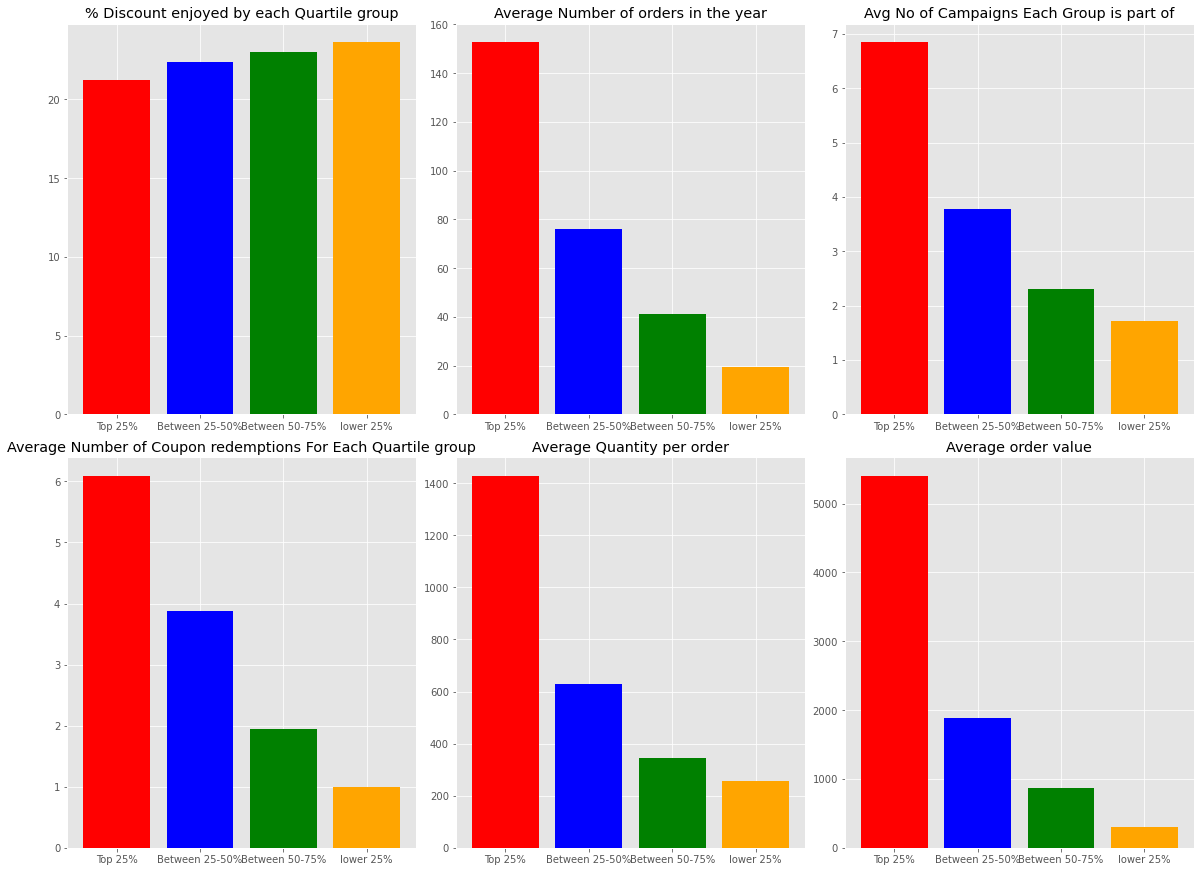

In [8]:
# Consumer metrics for different quartiles of customers
# Discount benefitted per consumer group

Transac_Main['Total_discount']=Transac_Main['retail_disc']+Transac_Main['coupon_disc']+Transac_Main['coupon_match_disc']

Transac_Main=Transac_Main[Transac_Main['sales_value_y']>0]

Transac_Main['Disc_Perc']=Transac_Main['Total_discount']*100/Transac_Main['sales_value_y']

Average_discount=Transac_Main.groupby('household_id',as_index=False)['Disc_Perc'].mean()

Average_discount=Average_discount.merge(Transac_Main[['household_id','Household_Quartile']],how='inner',on='household_id')

Average_discount=Average_discount.groupby('Household_Quartile',as_index=False)['Disc_Perc'].mean()
Average_discount

Quartiles=['Top 25%','Between 25-50%','Between 50-75%','lower 25%']
Average_discount['Household_Quartile'] = pd.Categorical(Average_discount['Household_Quartile'], categories=Quartiles, ordered=True)
Average_discount=Average_discount.sort_values(by='Household_Quartile')

fig, ax = plt.subplots(2,3, figsize=(16, 12), constrained_layout=True)
ax1=ax[0][0]
ax2=ax[0][1]
ax3=ax[0][2]
ax4=ax[1][0]
ax5=ax[1][1]
ax6=ax[1][2]

Household_Quartile=Average_discount['Household_Quartile']
Disc_Perc=Average_discount['Disc_Perc']

ax1.bar(Household_Quartile,Disc_Perc,color=['red','blue','green','orange'])
ax1.set_title('% Discount enjoyed by each Quartile group')
# addlabels(Household_Quartile,round(Disc_Perc,1))


# Average number of orders per quartile group

Basketcounts=Transac_Main.groupby('household_id')['basket_id'].unique().apply(lambda x:len(x))
Basketcounts=Basketcounts.reset_index()

Basketcounts=Basketcounts.merge(Transac_Main,how='inner',on='household_id')
Basketcounts=Basketcounts.groupby('Household_Quartile',as_index=False)['basket_id_x'].mean()

Quartiles=['Top 25%','Between 25-50%','Between 50-75%','lower 25%']
Basketcounts['Household_Quartile'] = pd.Categorical(Basketcounts['Household_Quartile'], categories=Quartiles, ordered=True)
Basketcounts=Basketcounts.sort_values(by='Household_Quartile')

Household_Quartile=Basketcounts['Household_Quartile']
orders=Basketcounts['basket_id_x']

ax2.bar(Household_Quartile,orders,color=['red','blue','green','orange'])
ax2.set_title('Average Number of orders in the year')
# addlabels(Household_Quartile,round(orders,1))


# Number of campaigns Quartiles are part of 
household_quartiles=Transac_Main[['household_id','Household_Quartile']]

Quartile_campaign=campaigns.groupby('household_id')['campaign_id'].unique().apply(lambda x:len(x))

Quartile_campaign=Quartile_campaign.reset_index()

Quartile_campaign=Quartile_campaign.merge(household_quartiles,how='inner',on='household_id')
Quartile_campaign=Quartile_campaign.groupby('Household_Quartile',as_index=False)['campaign_id'].mean()

Quartiles=['Top 25%','Between 25-50%','Between 50-75%','lower 25%']
Quartile_campaign['Household_Quartile'] = pd.Categorical(Quartile_campaign['Household_Quartile'], categories=Quartiles, ordered=True)
Quartile_campaign=Quartile_campaign.sort_values(by='Household_Quartile')

Household_Quartile=Quartile_campaign['Household_Quartile']
campaigns=Quartile_campaign['campaign_id']

ax3.bar(Household_Quartile,campaigns,color=['red','blue','green','orange'])
ax3.set_title('Avg No of Campaigns Each Group is part of')
# addlabels(Household_Quartile,campaigns)

# Number of average coupon redemptions for each quartile

Quartile_redemptions=coupon_redemptions.groupby('household_id')['coupon_upc'].unique().apply(lambda x:len(x))

Quartile_redemptions=Quartile_redemptions.reset_index()

Quartile_redemptions=Quartile_redemptions.merge(household_quartiles,how='inner',on='household_id')
Quartile_redemptions=Quartile_redemptions.groupby('Household_Quartile',as_index=False)['coupon_upc'].mean()

Quartiles=['Top 25%','Between 25-50%','Between 50-75%','lower 25%']
Quartile_redemptions['Household_Quartile'] = pd.Categorical(Quartile_redemptions['Household_Quartile'], categories=Quartiles, ordered=True)
Quartile_redemptions=Quartile_redemptions.sort_values(by='Household_Quartile')

Household_Quartile=Quartile_redemptions['Household_Quartile']
redemptions=Quartile_redemptions['coupon_upc']

ax4.bar(Household_Quartile,redemptions,color=['red','blue','green','orange'])
ax4.set_title('Average Number of Coupon redemptions For Each Quartile group')
# addlabels(Household_Quartile,round(redemptions,1))

# Average Quantity per order for quartile groups
Quantity=Transac_Main.groupby('household_id',as_index=False)['quantity'].sum()
baskets=Transac_Main.groupby('household_id')['basket_id'].unique().apply(lambda x:len(x))
baskets=baskets.reset_index()

Quantity=Quantity.merge(baskets,how='inner',on='household_id')

Quantity['Avgquantity']=Quantity['quantity']/Quantity['basket_id']

Quantity=Quantity.merge(household_quartiles,how='inner',on='household_id')
Quantity=Quantity.groupby('Household_Quartile',as_index=False)['Avgquantity'].mean()

Quartiles=['Top 25%','Between 25-50%','Between 50-75%','lower 25%']
Quantity['Household_Quartile'] = pd.Categorical(Quantity['Household_Quartile'], categories=Quartiles, ordered=True)
Quantity=Quantity.sort_values(by='Household_Quartile')

Household_Quartile=Quantity['Household_Quartile']
Avgquantity=Quantity['Avgquantity']

ax5.bar(Household_Quartile,Avgquantity,color=['red','blue','green','orange'])
ax5.set_title('Average Quantity per order')
# addlabels(Household_Quartile,round(Avgquantity,1))

# Average order value per quartile group

Ordervalue=Transac_Main.groupby('household_id',as_index=False)['sales_value_y'].sum()

Ordervalue=Ordervalue.merge(baskets,how='inner',on='household_id')

Ordervalue=Ordervalue.merge(household_quartiles,how='inner',on='household_id')
Ordervalue=Ordervalue.groupby('Household_Quartile',as_index=False)['sales_value_y'].mean()

Quartiles=['Top 25%','Between 25-50%','Between 50-75%','lower 25%']
Ordervalue['Household_Quartile'] = pd.Categorical(Ordervalue['Household_Quartile'], categories=Quartiles, ordered=True)
Ordervalue=Ordervalue.sort_values(by='Household_Quartile')

Household_Quartile=Ordervalue['Household_Quartile']
Avgordervalue=Ordervalue['sales_value_y']

ax6.bar(Household_Quartile,Avgordervalue,color=['red','blue','green','orange'])
ax6.set_title('Average order value')
# addlabels(Household_Quartile,round(Avgordervalue,1))

plt.style.use('ggplot')
plt.show()


## Consumer Profiling of Top 25%

**Defining the characteristics of the consumer groups based on the demographic data:**

+ Based on different demographics variables created the top 25% consumer profile

**Comments on the charts:**

+ The income range for the top consumers is 35k-99k
+ Age group for the top consumers is 25-54
+ Household size could be around 1-2
+ Number of kids is 0 for the top consumers

In [9]:
top_consumers = householdsales.loc[householdsales['Household_Quartile'] == 'Top 25%']
top_consumers_profile = top_consumers.merge(demographics, how='inner', on='household_id')


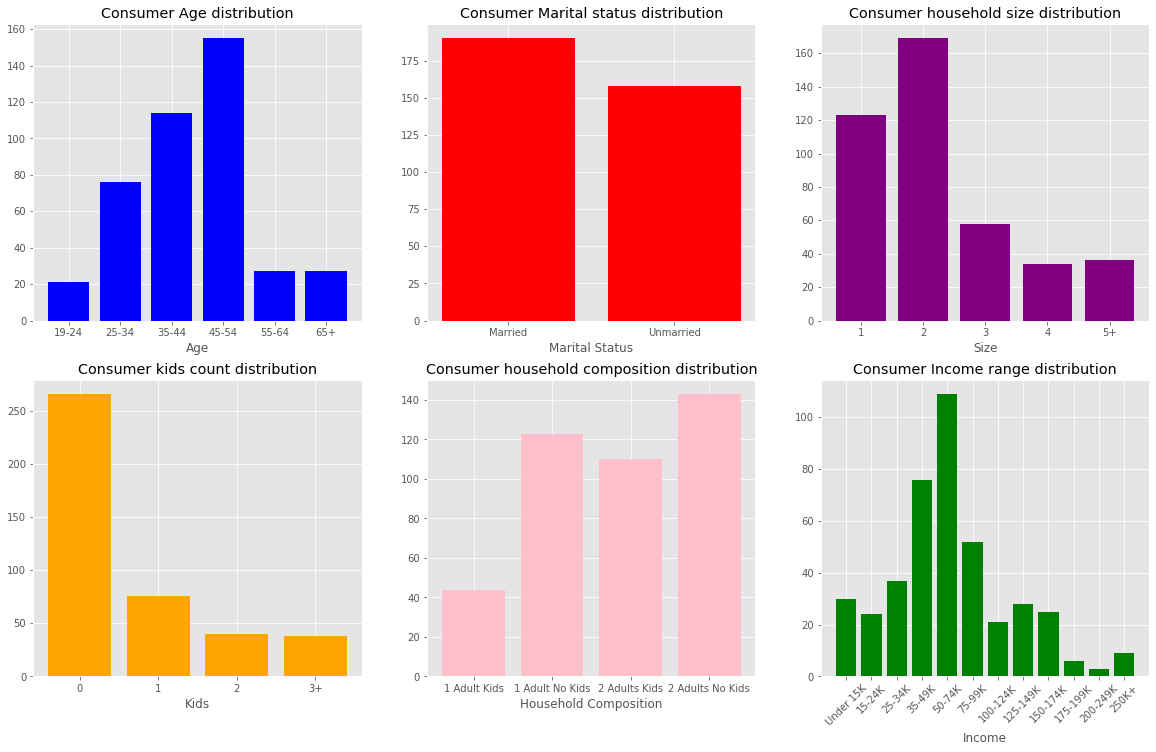

In [10]:
# Consumer income distribution

fig, ax = plt.subplots(2,3, figsize=(20, 12))
ax1=ax[0][0]
ax2=ax[0][1]
ax3=ax[0][2]
ax4=ax[1][0]
ax5=ax[1][1]
ax6=ax[1][2]

# 25% Consumer age distribution

age_distribution = top_consumers_profile.groupby('age', as_index=False)['sales_value'].count().sort_values(by = 'age', ascending = True)

age = age_distribution['age']
count = age_distribution['sales_value']

ax1.bar(age, count, color = 'blue')
ax1.set_xlabel('Age')
ax1.set_title("Consumer Age distribution")

# addlabels(age,count)

# 25% Consumer marital status distribution

marital_distribution = top_consumers_profile.groupby('marital_status', as_index=False)['sales_value'].count().sort_values(by = 'marital_status', ascending = True)

maritalstatus = marital_distribution['marital_status']
count = marital_distribution['sales_value']

ax2.bar(maritalstatus, count, color = 'red')
ax2.set_xlabel('Marital Status')
ax2.set_title("Consumer Marital status distribution")
# addlabels(maritalstatus,count)

# 25% Consumer household size distribution

size_distribution = top_consumers_profile.groupby('household_size', as_index=False)['sales_value'].count().sort_values(by = 'household_size', ascending = True)

size = size_distribution['household_size']
count = size_distribution['sales_value']

ax3.bar(size, count, color = 'purple')
ax3.set_xlabel('Size')
ax3.set_title("Consumer household size distribution")
# addlabels(size,count)

# 25% Consumer kids count distribution

kids_distribution = top_consumers_profile.groupby('kids_count', as_index=False)['sales_value'].count().sort_values(by = 'kids_count', ascending = True)

kids = kids_distribution['kids_count']
count = kids_distribution['sales_value']

ax4.bar(kids, count, color = 'orange')
ax4.set_xlabel('Kids')
ax4.set_title("Consumer kids count distribution")
# addlabels(kids,count)

# 25% Consumer household composition distribution

composition_distribution = top_consumers_profile.groupby('household_comp', as_index=False)['sales_value'].count().sort_values(by = 'household_comp', ascending = True)

composition = composition_distribution['household_comp']
count = composition_distribution['sales_value']

ax5.bar(composition, count, color = 'pink')
ax5.set_xlabel('Household Composition')
ax5.set_title("Consumer household composition distribution")
# addlabels(composition,count)

income_order = CategoricalDtype(['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+' ], ordered=True)

top_consumers_profile['income'] = top_consumers_profile['income'].astype(income_order)

income_distribution = top_consumers_profile.groupby('income', as_index=False)['sales_value'].count().sort_values('income')

income = income_distribution['income']
count = income_distribution['sales_value']

ax6.bar(income, count, color = 'green')
ax6.set_xlabel('Income')
#ax6.set_xticklabels(income_order,rotation=45)
ax6.set_title("Consumer Income range distribution")
#fig.autofmt_xdate()
# addlabels(income,count)

plt.xticks(rotation=45)
#fig.autofmt_xdate()
plt.style.use('ggplot')
plt.show()

## Frequent Products Purchase

**Understanding the key product classification that our top consumers are purchasing:**

+ Which product categories have more share of sales for the top consumers
+ Which product categories have more share of quantity for the top consumers

**Comments on the charts:**

+ When we looked at the order of sales for product categories between the top 25% consumers and overall consumers there is not much difference
+ So, whatever the categories which are highest for top consumers can be used for overall consumers

In [11]:
product_category_sales = top_consumers.merge(transactions, how='inner', on='household_id').merge(products, how='inner', on='product_id')

In [12]:
#pd.set_option('display.float_format', lambda x: '%.f' % x)

In [13]:
#product_category = product_category_sales.groupby('product_category', as_index=False)['sales_value_x'].sum().sort_values(by = 'sales_value_x', ascending = False).head(10)
#product_category

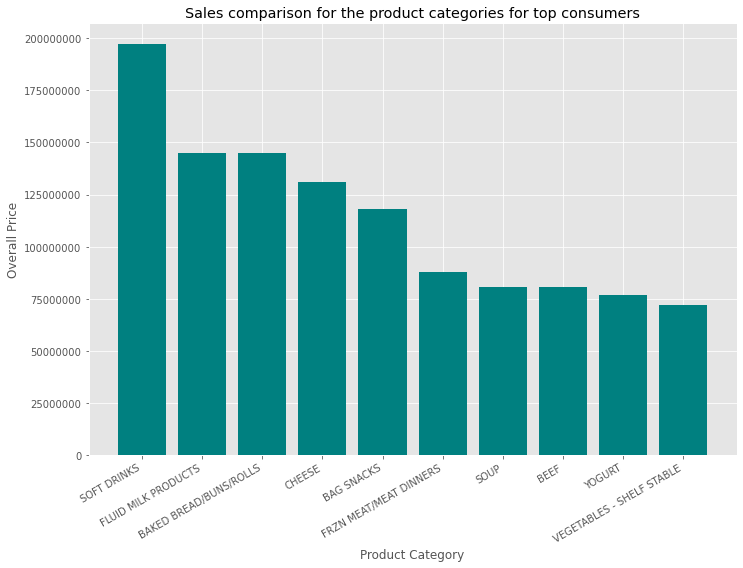

In [14]:
product_category = product_category_sales.groupby('product_category', as_index=False)['sales_value_x'].sum().sort_values(by = 'sales_value_x', ascending = False).head(10)

category = product_category['product_category']
overall_price = product_category['sales_value_x']

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(category, overall_price, color = 'teal')
ax.set_ylabel('Overall Price')
ax.set_xlabel('Product Category')
ax.set_title("Sales comparison for the product categories for top consumers")

# addlabels(category,overall_price)
plt.style.use('ggplot')
plt.ticklabel_format(style='plain', axis='y')
fig.autofmt_xdate()
plt.show()

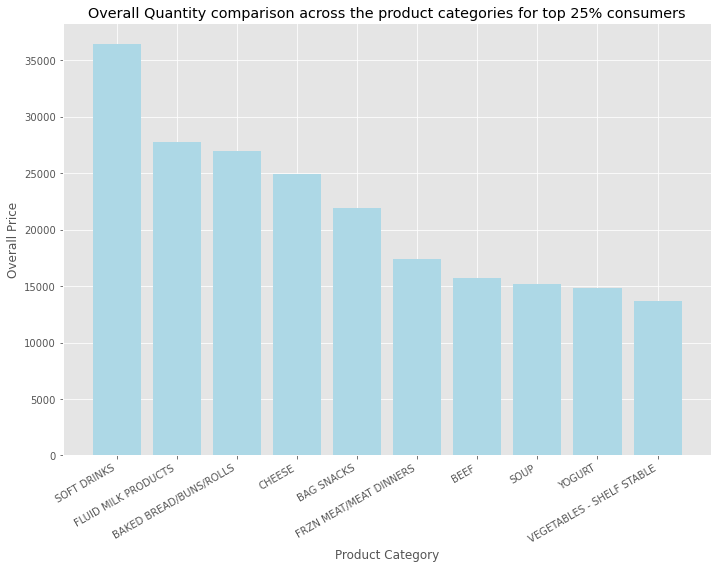

In [15]:
product_category_count = product_category_sales.groupby('product_category', as_index=False)['sales_value_x'].count().sort_values(by = 'sales_value_x', ascending = False).head(10)

category = product_category_count['product_category']
count = product_category_count['sales_value_x']

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(category, count, color = 'lightblue')
ax.set_ylabel('Overall Price')
ax.set_xlabel('Product Category')
ax.set_title("Overall Quantity comparison across the product categories for top 25% consumers")

plt.style.use('ggplot')
fig.autofmt_xdate()
plt.show()

## Purchase Trends

**Understanding the purchase patterns of the top consumers based on the week day:**

+ Extracted the day, month or quarters from the transaction timestamp and analysed the seasonality patterns from it

**Comments on the charts:**

+ There is not much clear difference in trends over the months for the top consumers
+ Whereas we can clearly see that over the weekends there is increase in overall salesm

In [16]:
days_of_week = transactions.merge(top_consumers, how='inner', on='household_id')

In [17]:
days_of_week['year'] = pd.DatetimeIndex(days_of_week['transaction_timestamp']).year
days_of_week['month'] = pd.DatetimeIndex(days_of_week['transaction_timestamp']).month
days_of_week['day month'] = pd.DatetimeIndex(days_of_week['transaction_timestamp']).day
days_of_week['day'] = pd.DatetimeIndex(days_of_week['transaction_timestamp']).day_of_week
days_of_week['day week'] = pd.DatetimeIndex(days_of_week['transaction_timestamp']).day_name()

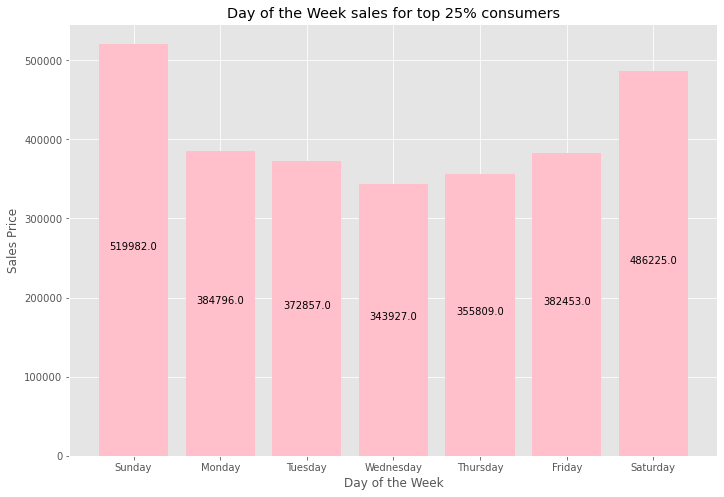

In [18]:
order_days = CategoricalDtype(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered = True)
days_of_week['day week'] = days_of_week['day week'].astype(order_days)

days_of_the_week = days_of_week.groupby('day week', as_index=False)['sales_value_x'].sum().sort_values('day week').round()
days_of_the_week

dayweek = days_of_the_week['day week']
sales_price = days_of_the_week['sales_value_x']

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(dayweek, sales_price, color = 'pink')
ax.set_ylabel('Sales Price')
ax.set_xlabel('Day of the Week')
ax.set_title("Day of the Week sales for top 25% consumers")


addlabels(dayweek,sales_price)
plt.style.use('ggplot')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

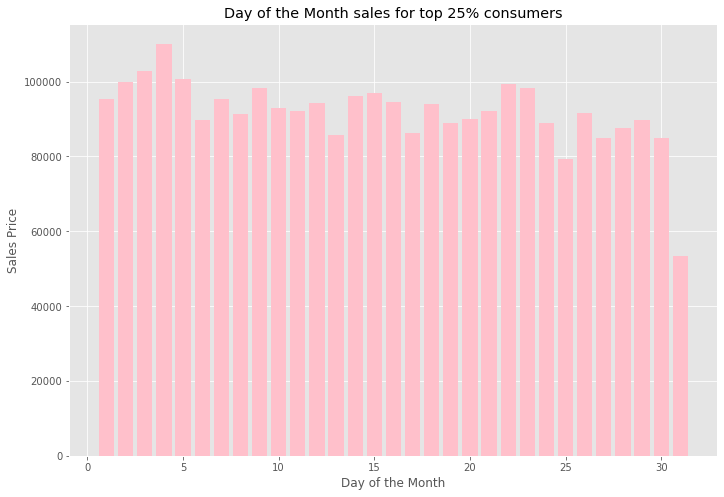

In [19]:

days_of_the_month = days_of_week.groupby('day month', as_index=False)['sales_value_x'].sum().sort_values(by = 'day month', ascending = True).round()
days_of_the_month

daymonth = days_of_the_month['day month']
sales_price = days_of_the_month['sales_value_x']

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(daymonth, sales_price, color = 'pink')
ax.set_ylabel('Sales Price')
ax.set_xlabel('Day of the Month')
ax.set_title("Day of the Month sales for top 25% consumers")

ax.ticklabel_format(useOffset=False, style='plain')
plt.show()


In [20]:
def day_group (x):
    if x<=5:
        return '1-5 days'
    elif x<=10:
        return '6-10 days'
    elif x<=15:
        return '11-15 days'
    elif x<=20:
        return '16-20 days'
    elif x<=25:
        return '21-25 days'
    else:
        return '26-31 days'
    
days_of_week['day_group'] = days_of_week['day month'].apply(day_group)

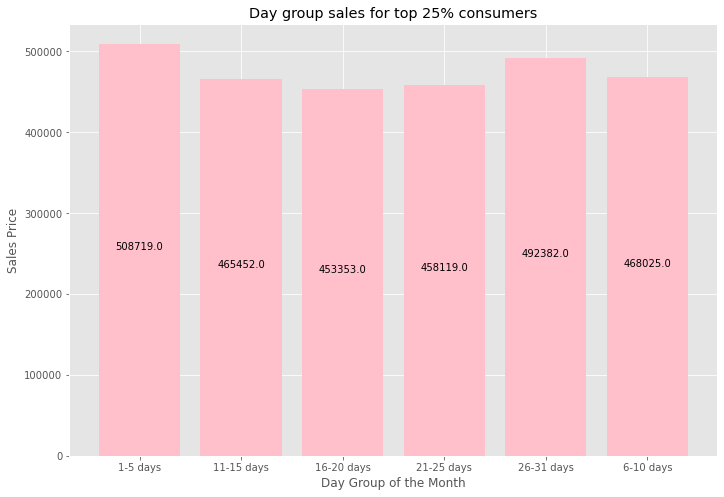

In [21]:
daygroup = days_of_week.groupby('day_group', as_index=False)['sales_value_x'].sum().sort_values(by = 'day_group', ascending = True).round()
daygroup

groupday = daygroup['day_group']
sales_price = daygroup['sales_value_x']

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(groupday, sales_price, color = 'pink')
ax.set_ylabel('Sales Price')
ax.set_xlabel('Day Group of the Month')
ax.set_title("Day group sales for top 25% consumers")

addlabels(groupday,sales_price)
plt.style.use('ggplot')
plt.ticklabel_format(style='plain', axis='y')
plt.show()



# Summary

# Investment Strategy

+ We can clearly see the contribution of top 25% consumers is highest with around 60%. So, to drive more revenue its ideal to put investment in this consumer profile
+ The discount enjoyed by the consumers, top 25% consumer group is enjoying less compared to others. Which will have positive impact on the profit books
+ Top consumer has the following characteristics: Income range 35k-99k, Age group 25-54, Household size 1-2, Number of kids 0

## Marketing Strategies

In [ ]:
+ Top consumers usually buy from the store on weekends so it’s better to operate promotions during the weekends
+ While Acquiring the new consumers it’s ideal to look after the top 25% consumer profile because of the sales behaviour

## Limitations

+ Order of sales for product categories between the top 25% consumers and overall consumers there is not much difference
+ So, whatever the categories which are highest for top consumers can be used for overall consumers